# Visión por Computadora

### Alan Reyes-Figueroa

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from skimage.color import rgb2gray, gray2rgb
from skimage import data
from PIL import Image

from time import time 

from scipy.signal import convolve2d, correlate2d

import cv2

# Image Integral 

In [2]:
A = np.array([[1,0,0,1,0], [0,0,0,1,0], [0,1,0,1,0], [1,1,0,1,0], [1,0,0,0,1]])

In [3]:
print(A)

[[1 0 0 1 0]
 [0 0 0 1 0]
 [0 1 0 1 0]
 [1 1 0 1 0]
 [1 0 0 0 1]]


In [4]:
def ImageIntegral(x):
    h, w = x.shape
    z = np.zeros(x.shape).astype(np.uint8)
    for i in range(0, h):
        z[i,:] = x[i,:].cumsum()
        
    for j in range(0, w):
        z[:,j] = z[:,j].cumsum()
    return z

In [5]:
intA = ImageIntegral(A)

In [6]:
print(intA)

[[ 1  1  1  2  2]
 [ 1  1  1  3  3]
 [ 1  2  2  5  5]
 [ 2  4  4  8  8]
 [ 3  5  5  9 10]]


In [7]:
def ImageDerivative(x):
    h, w = x.shape
    z = x.copy()
    for i in range(0, h):
        z[i,1:] = np.diff(x[i,:])
        
    for j in range(0, w):
        z[1:,j] = np.diff(z[:,j])
    return z

In [8]:
B = ImageDerivative(intA)

In [9]:
print(B)

[[1 0 0 1 0]
 [0 0 0 1 0]
 [0 1 0 1 0]
 [1 1 0 1 0]
 [1 0 0 0 1]]


# Importance of Image Integral

In [10]:
# sum of elements in A[1:4, 1:4]
tik = time()
suma = A[1:4,1:4].sum()
tok = time()

print(suma)
print('Elapsed time:', tok-tik, 'seconds')

5
Elapsed time: 3.0040740966796875e-05 seconds


In [11]:
# with Image Integral
tik = time()
intA[3,3] - intA[0,3] - intA[3,0] + intA[0,0]
tok = time()

print(suma)
print('Elapsed time:', tok-tik, 'seconds')

5
Elapsed time: 2.7179718017578125e-05 seconds


# Descriptors

In [12]:
imagePath = 'bricks1.jpeg'

In [13]:
I = plt.imread(imagePath)
I.shape

(319, 474, 3)

In [14]:
J = rgb2gray(I)
J.shape

(319, 474)

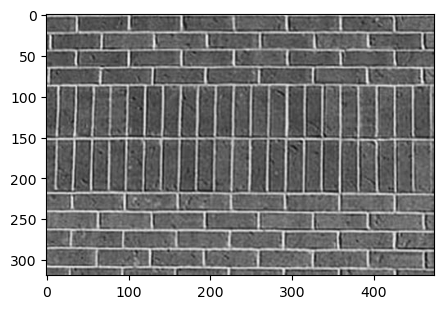

In [15]:
plt.figure(figsize=(5,5))
plt.imshow(J, cmap='gray')
plt.show()

In [16]:
h1 = np.ones((20,3)).astype(np.int)
h2 = np.zeros((20,3)).astype(np.int) 

Haar1 = np.hstack([h1,h2])
Haar1.shape

/var/folders/f1/cqb0l9vj1qldx3pn1mfwcv640000gn/T/ipykernel_4898/2676503615.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  h1 = np.ones((20,3)).astype(np.int)
/var/folders/f1/cqb0l9vj1qldx3pn1mfwcv640000gn/T/ipykernel_4898/2676503615.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current

(20, 6)

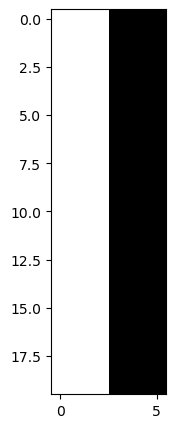

In [17]:
plt.figure(figsize=(5,5))
plt.imshow(Haar1, cmap='gray')
plt.show()

In [18]:
Jaar1 = 2*Haar1-1
Jaar1.shape

(20, 6)

In [19]:
print(Haar1.min(), Haar1.max())
print(Jaar1.min(), Jaar1.max())

0 1
-1 1


In [20]:
F = correlate2d(J, Jaar1, 'same', boundary='symmetric')
F.shape

(319, 474)

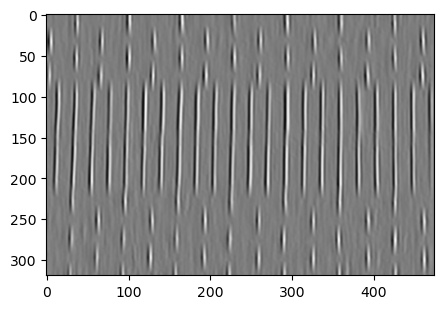

In [21]:
plt.figure(figsize=(5,5))
plt.imshow(F, cmap='gray')
plt.show()

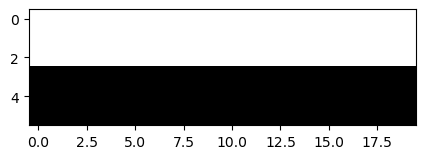

In [22]:
plt.figure(figsize=(5,5))
plt.imshow(Jaar1.T, cmap='gray')
plt.show()

In [23]:
F2 = correlate2d(J, Jaar1.T, 'same', boundary='symmetric')
F2.shape

(319, 474)

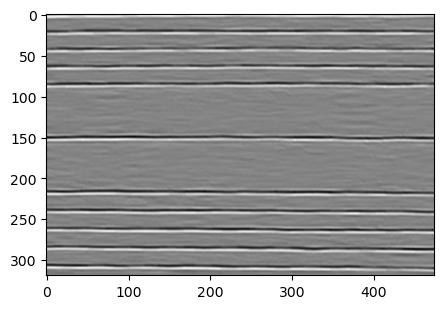

In [24]:
plt.figure(figsize=(5,5))
plt.imshow(F2, cmap='gray')
plt.show()

In [25]:
h11 = np.ones((3,3)).astype(np.int)
h12 = np.zeros((3,3)).astype(np.int) 

Haar3 = np.hstack([np.vstack([h11,h12]), np.vstack([h12,h11])])
Haar3.shape

/var/folders/f1/cqb0l9vj1qldx3pn1mfwcv640000gn/T/ipykernel_4898/617649990.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  h11 = np.ones((3,3)).astype(np.int)
/var/folders/f1/cqb0l9vj1qldx3pn1mfwcv640000gn/T/ipykernel_4898/617649990.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current u

(6, 6)

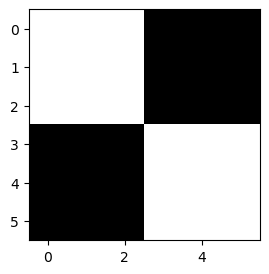

In [26]:
plt.figure(figsize=(3,3))
plt.imshow(Haar3, cmap='gray')
plt.show()

In [27]:
Jaar3 = 2*Haar3-1
Jaar3.shape

(6, 6)

In [28]:
F3 = correlate2d(J, Jaar3, 'same', boundary='symmetric')
F3.shape

(319, 474)

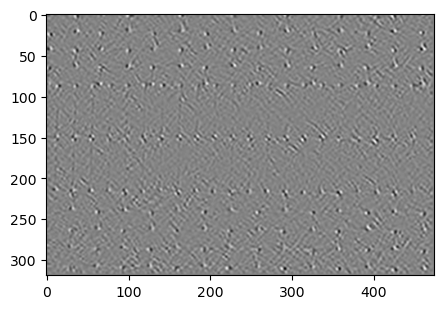

In [29]:
plt.figure(figsize=(5,5))
plt.imshow(F3, cmap='gray')
plt.show()

# Image (OpenCV)

In [30]:
img = cv2.imread(imagePath)
img.shape

(319, 474, 3)

In [31]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_image.shape

(319, 474)

In [32]:
gray_image.max()

235

# Image Integral

In [33]:
integralI = cv2.integral(gray_image)

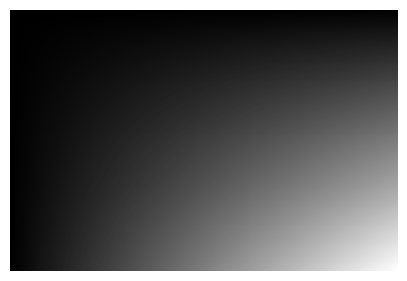

In [34]:
plt.figure(figsize=(5,5))
plt.imshow(integralI, cmap='gray')
plt.axis('off')
plt.show()